In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, mean_squared_error


In [30]:
df = pd.read_csv("flight.csv")

In [31]:
df.head(5)


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


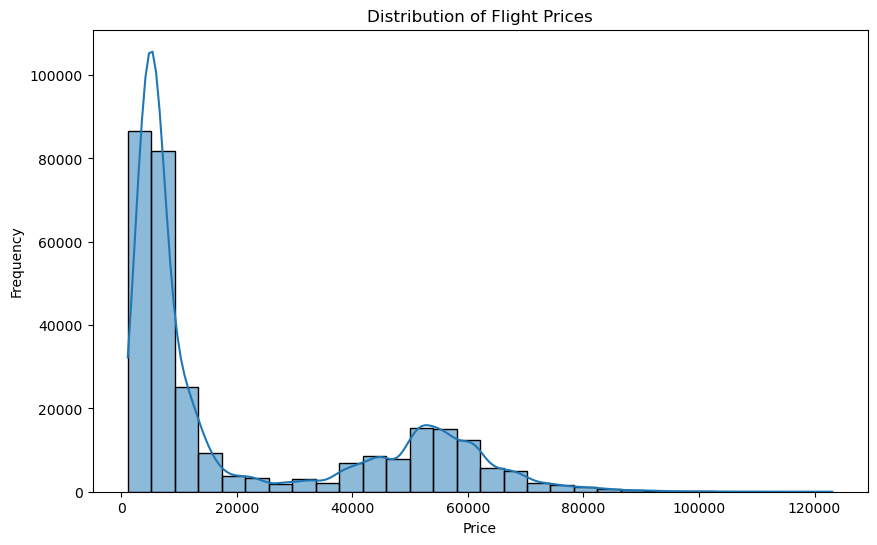

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


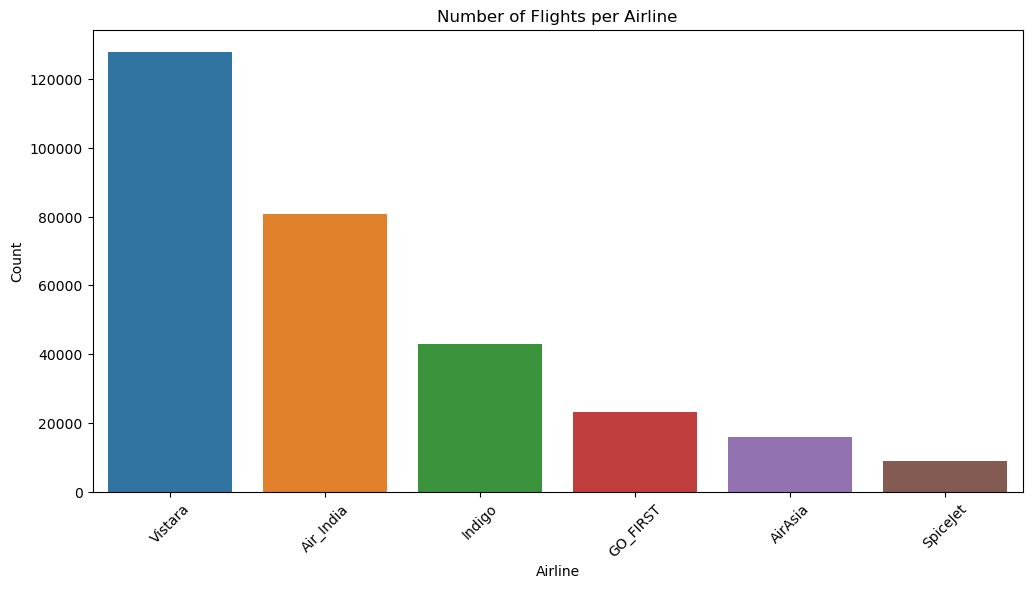

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='airline', order=df['airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


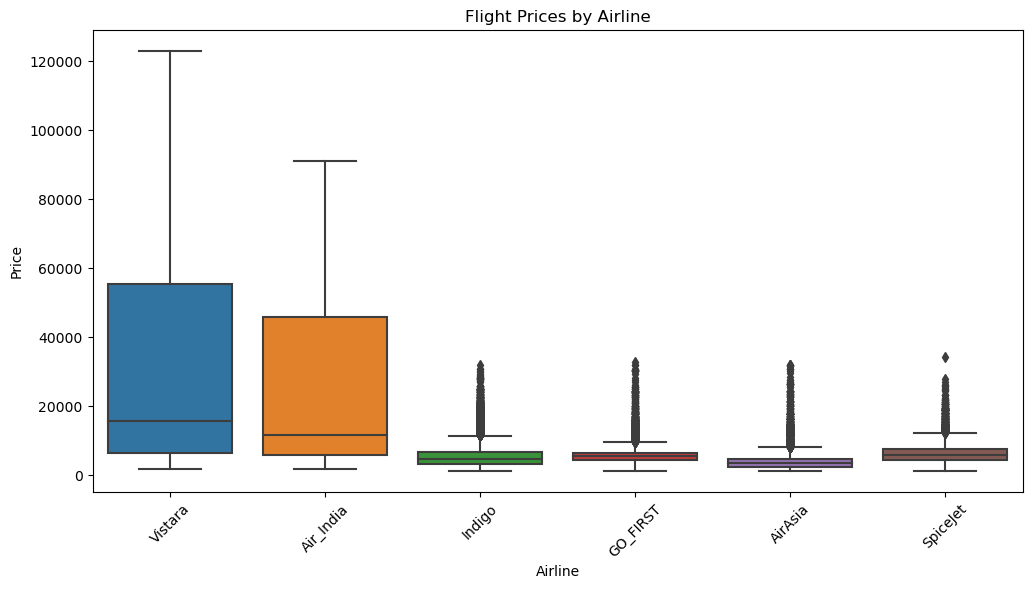

In [35]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='airline', y='price', order=df['airline'].value_counts().index)
plt.title('Flight Prices by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


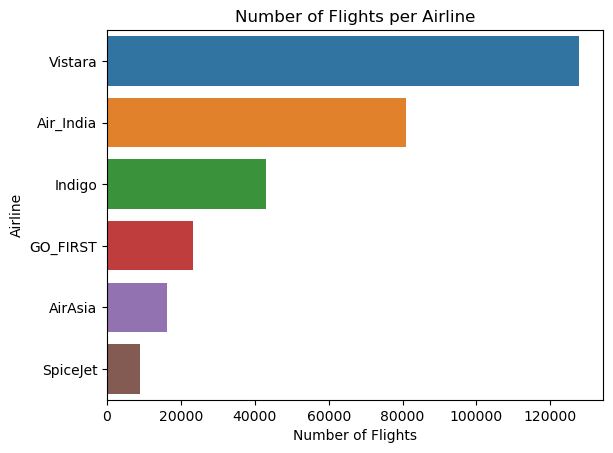

In [50]:
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Number of Flights per Airline')
plt.xlabel('Number of Flights')
plt.ylabel('Airline')
plt.show()


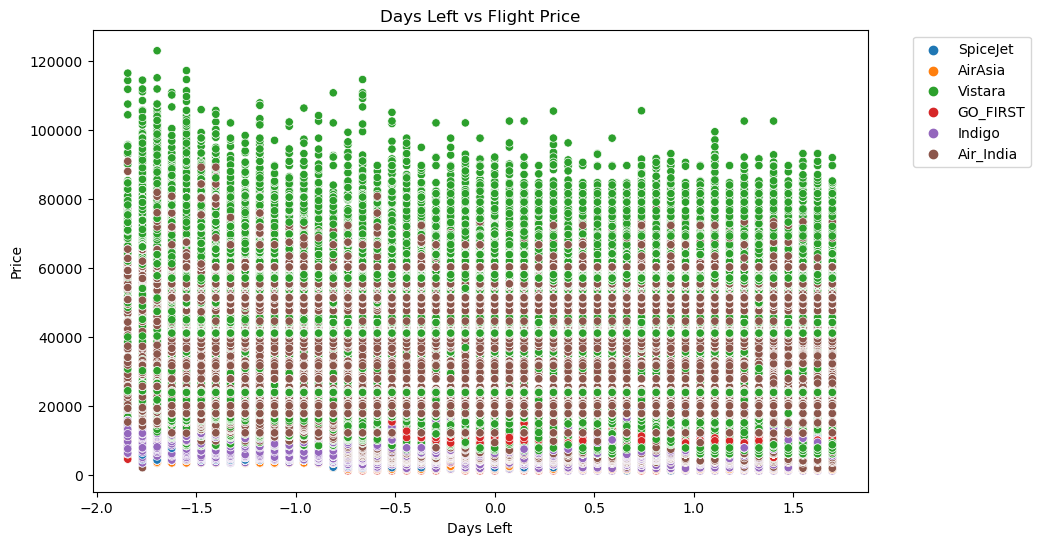

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='days_left', y='price', hue='airline')
plt.title('Days Left vs Flight Price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


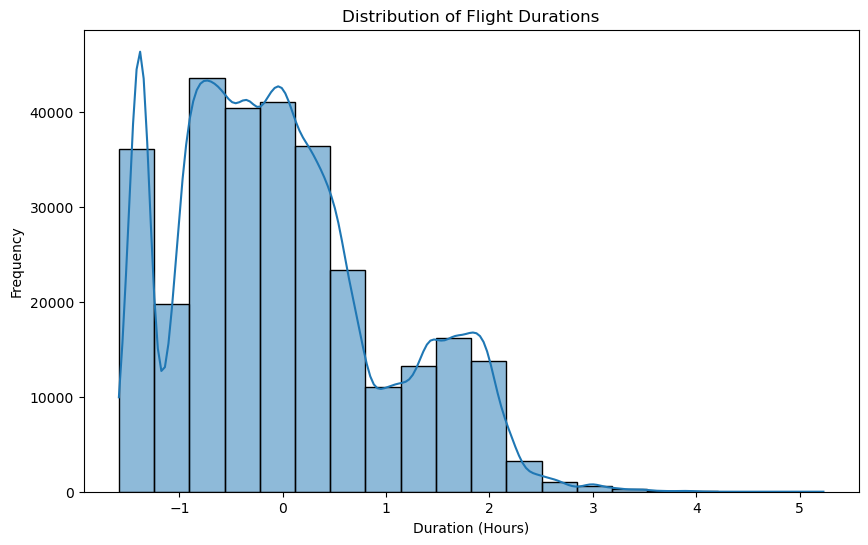

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], kde=True, bins=20)
plt.title('Distribution of Flight Durations')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.show()


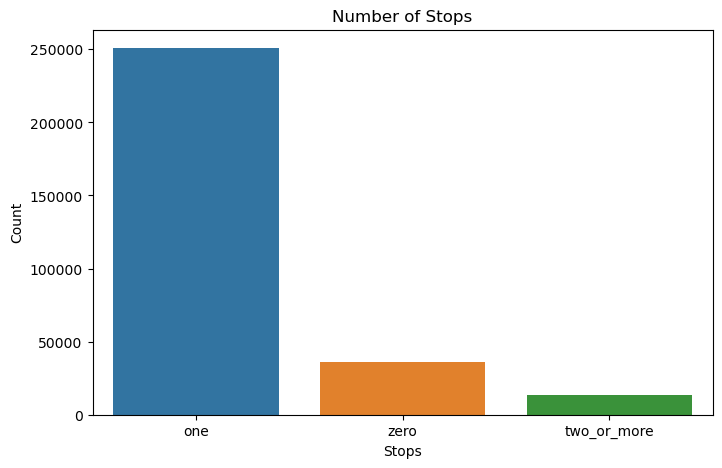

In [53]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='stops', order=df['stops'].value_counts().index)
plt.title('Number of Stops')
plt.xlabel('Stops')
plt.ylabel('Count')
plt.show()


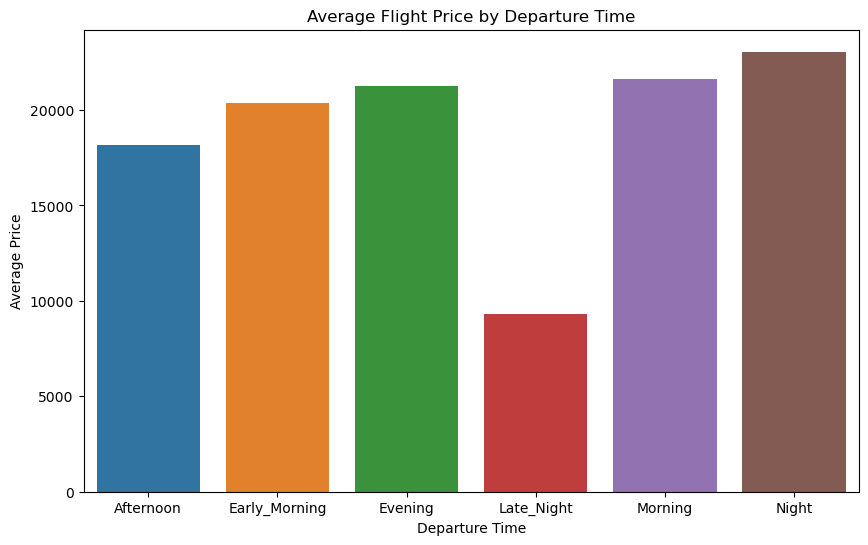

In [54]:
# Calculate average price for each departure time category
avg_price_dep = df.groupby('departure_time')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_dep, x='departure_time', y='price')
plt.title('Average Flight Price by Departure Time')
plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.show()


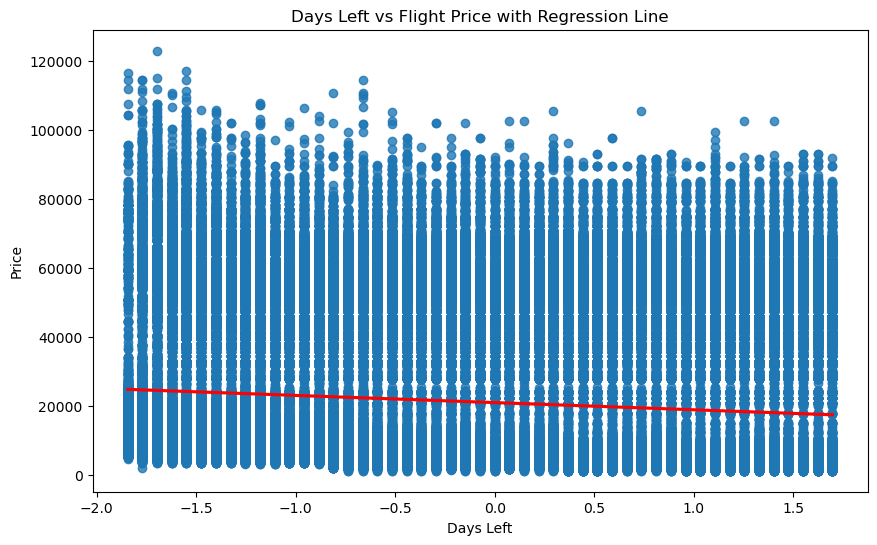

In [55]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='days_left', y='price', line_kws={'color': 'red'})
plt.title('Days Left vs Flight Price with Regression Line')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()


/var/folders/mr/52wh4cm908z1w7y9hz4qzsbc0000gn/T/ipykernel_25077/3881212173.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='departure_time', y='price', data=df, estimator=np.mean, ci=None)


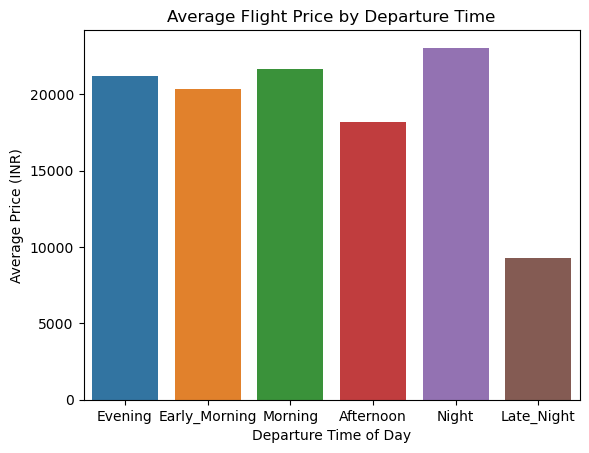

In [57]:
sns.barplot(x='departure_time', y='price', data=df, estimator=np.mean, ci=None)
plt.title('Average Flight Price by Departure Time')
plt.xlabel('Departure Time of Day')
plt.ylabel('Average Price (INR)')
plt.show()


In [58]:
# Drop the index column if it's unnecessary
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)


In [59]:
# Check for missing values
print(df.isnull().sum())

# For simplicity, drop rows with missing values (you can also choose imputation)
df.dropna(inplace=True)


airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64


In [60]:
# Map the 'stops' column to numeric values
stops_mapping = {'zero': 0, 'one': 1, 'two_or_more': 2}
df['stops'] = df['stops'].map(stops_mapping)


In [61]:
categorical_cols = ['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city', 'class']

# Apply one-hot encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [62]:
df.drop('flight', axis=1, inplace=True)

KeyError: "['flight'] not found in axis"

In [63]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns (excluding the target column 'price')
num_cols = ['duration', 'days_left']

# Initialize the scaler and apply to numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [64]:
df.head(20)

,stops,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,0,-1.397531,-1.843875,5953,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,0,-1.375284,-1.843875,5953,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,1
2,0,-1.397531,-1.843875,5956,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,0,-1.386407,-1.843875,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
4,0,-1.375284,-1.843875,5955,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
5,0,-1.375284,-1.843875,5955,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
6,0,-1.410045,-1.843875,6060,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,1
7,0,-1.397531,-1.843875,6060,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1
8,0,-1.397531,-1.843875,5954,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
9,0,-1.386407,-1.843875,5954,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1


In [65]:
# Final dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   stops                         300153 non-null  int64  
 1   duration                      300153 non-null  float64
 2   days_left                     300153 non-null  float64
 3   price                         300153 non-null  int64  
 4   airline_Air_India             300153 non-null  uint8  
 5   airline_GO_FIRST              300153 non-null  uint8  
 6   airline_Indigo                300153 non-null  uint8  
 7   airline_SpiceJet              300153 non-null  uint8  
 8   airline_Vistara               300153 non-null  uint8  
 9   source_city_Chennai           300153 non-null  uint8  
 10  source_city_Delhi             300153 non-null  uint8  
 11  source_city_Hyderabad         300153 non-null  uint8  
 12  source_city_Kolkata           300153 non-nul

Train: (60000, 29) Validation: (20000, 29) Test: (20000, 29)
Original features: 29 PCA features: 20


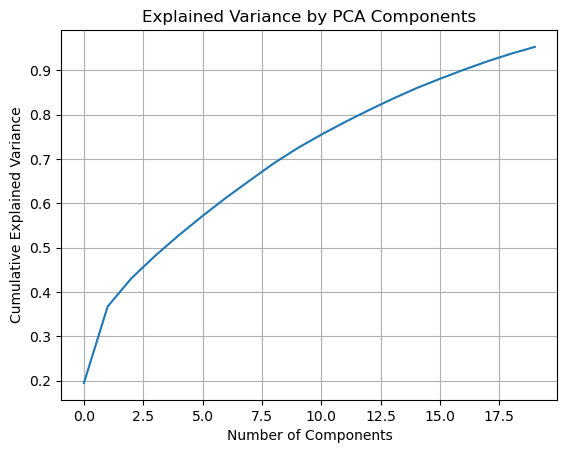


=== LinearRegression on Original Data ===
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best params: {}
Train RMSE: 6846.64, Val RMSE: 6668.09
Train R²: 0.91, Adjusted Train R²: 0.91
Val R²: 0.91, Adjusted Val R²: 0.91

=== LinearRegression on PCA Data ===
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best params: {}
Train RMSE (PCA): 7162.29, Val RMSE (PCA): 6985.36
Train R² (PCA): 0.90, Adjusted Train R² (PCA): 0.90
Val R² (PCA): 0.90, Adjusted Val R² (PCA): 0.90

=== Ridge on Original Data ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best params: {'alpha': 1.0}
Train RMSE: 6846.64, Val RMSE: 6668.09
Train R²: 0.91, Adjusted Train R²: 0.91
Val R²: 0.91, Adjusted Val R²: 0.91

=== Ridge on PCA Data ===
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best params: {'alpha': 1.0}
Train RMSE (PCA): 7162.29, Val RMSE (PCA): 6985.37
Train R² (PCA): 0.90, Adjusted Train R² (PCA): 0.90
Val R² (PCA): 0.90, Adjusted Val R² (PCA): 0.90

===

Training Ensembles:   0%|          | 0/8 [00:00<?, ?it/s]


Training Ensemble Model: Voting
Voting -- Train RMSE: 3029.95, Test RMSE: 3743.78
Voting -- Train R²: 0.98, Adjusted Train R²: 0.98
Voting -- Test R²: 0.97, Adjusted Test R²: 0.97


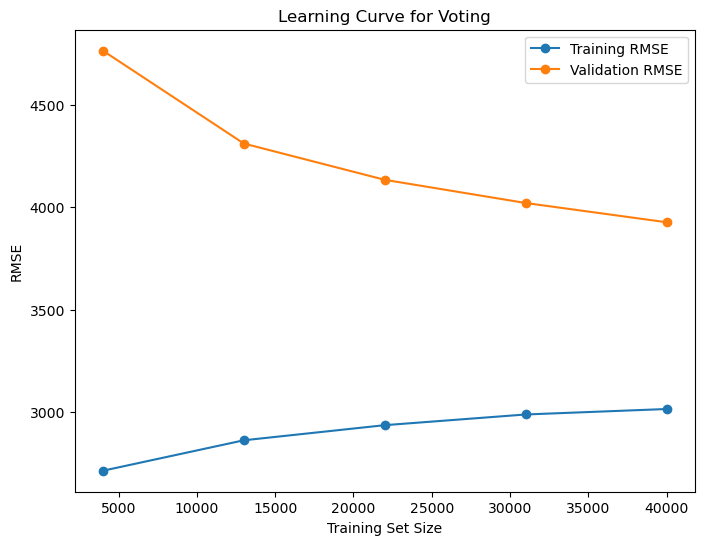


Training Ensemble Model: Bagging


/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging -- Train RMSE: 2238.81, Test RMSE: 3200.19
Bagging -- Train R²: 0.99, Adjusted Train R²: 0.99
Bagging -- Test R²: 0.98, Adjusted Test R²: 0.98


/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/amin/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.w

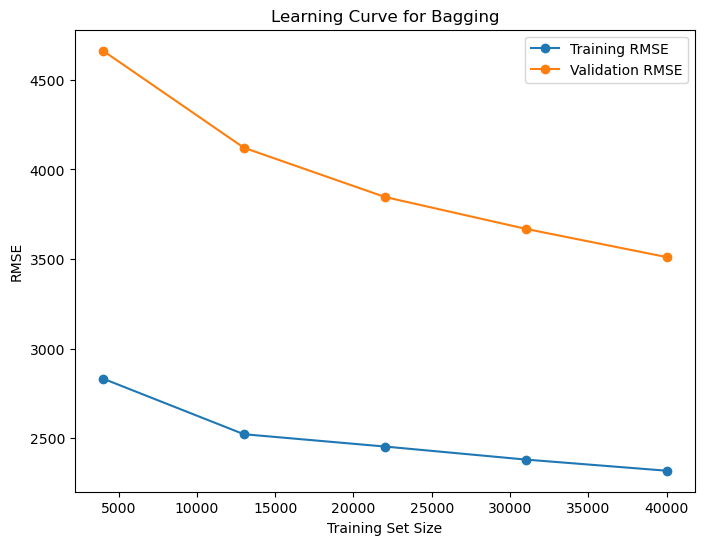


Training Ensemble Model: Stacking
Stacking -- Train RMSE: 2125.34, Test RMSE: 3240.17
Stacking -- Train R²: 0.99, Adjusted Train R²: 0.99
Stacking -- Test R²: 0.98, Adjusted Test R²: 0.98


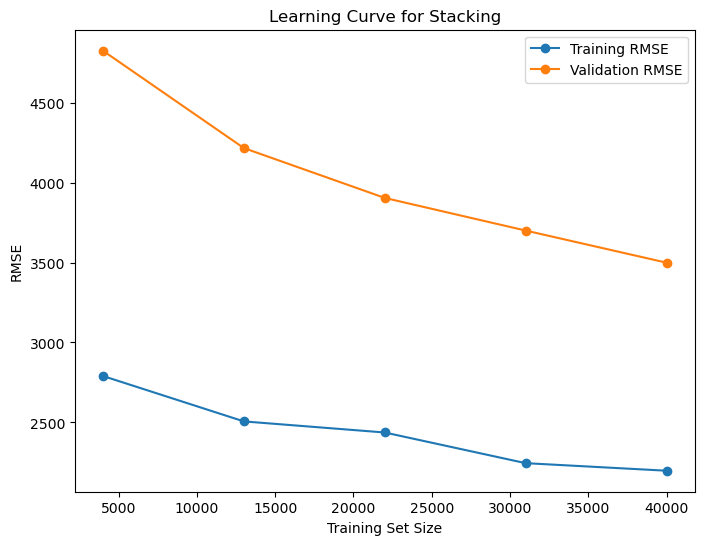


Training Ensemble Model: ExtraTrees
ExtraTrees -- Train RMSE: 269.64, Test RMSE: 3307.91
ExtraTrees -- Train R²: 1.00, Adjusted Train R²: 1.00
ExtraTrees -- Test R²: 0.98, Adjusted Test R²: 0.98


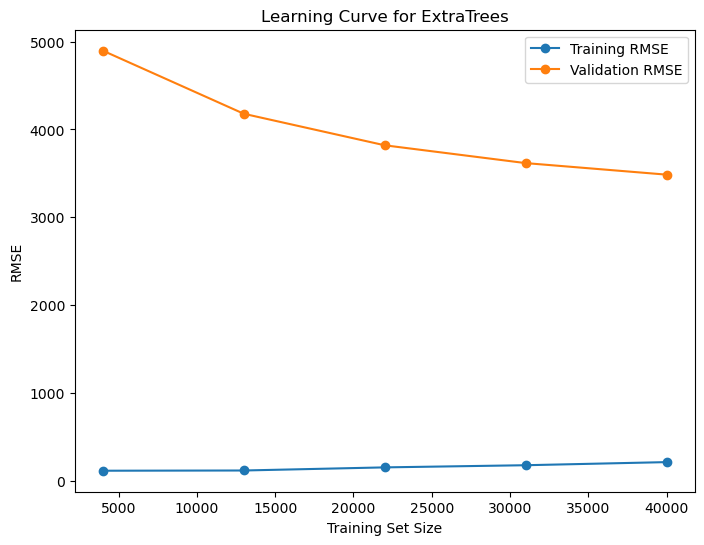


Training Ensemble Model: AdaBoost
AdaBoost -- Train RMSE: 5839.47, Test RMSE: 5790.48
AdaBoost -- Train R²: 0.93, Adjusted Train R²: 0.93
AdaBoost -- Test R²: 0.93, Adjusted Test R²: 0.93


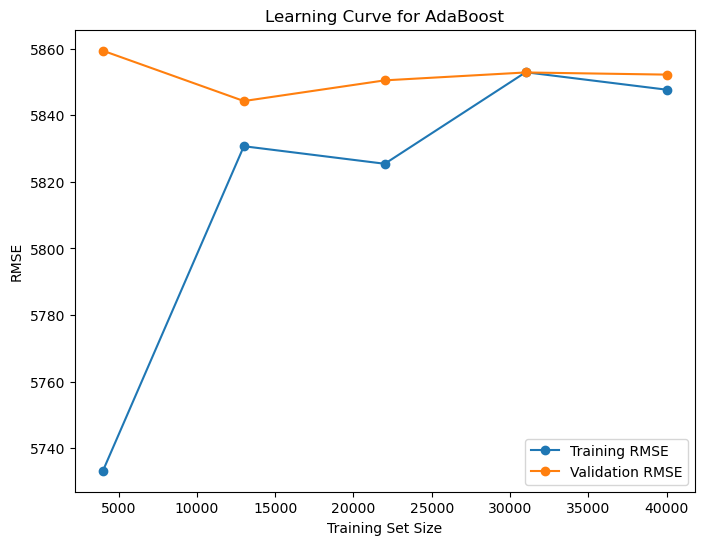


Training Ensemble Model: GradientBoosting
GradientBoosting -- Train RMSE: 6275.87, Test RMSE: 6158.17
GradientBoosting -- Train R²: 0.92, Adjusted Train R²: 0.92
GradientBoosting -- Test R²: 0.93, Adjusted Test R²: 0.93


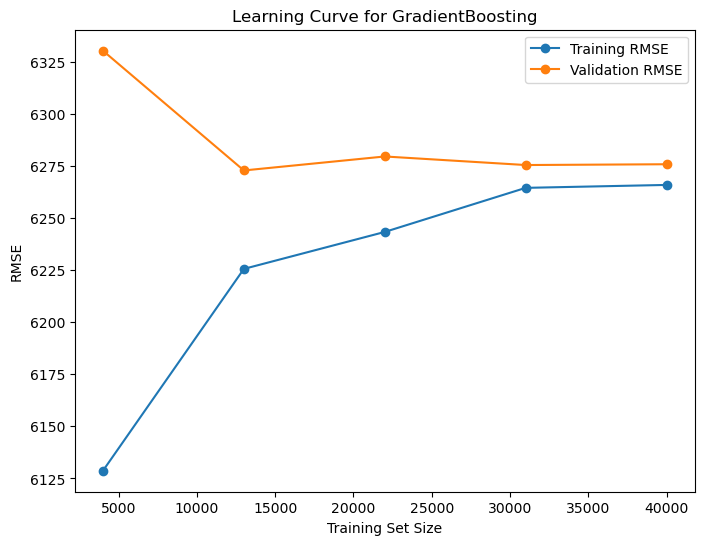


Training Ensemble Model: RandomForest
RandomForest -- Train RMSE: 1290.87, Test RMSE: 3107.22
RandomForest -- Train R²: 1.00, Adjusted Train R²: 1.00
RandomForest -- Test R²: 0.98, Adjusted Test R²: 0.98


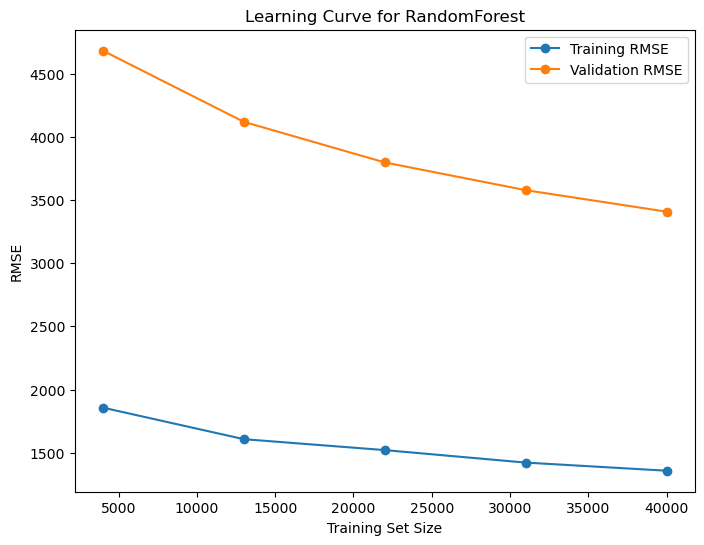


Training Ensemble Model: Stacking2
Stacking2 -- Train RMSE: 2260.82, Test RMSE: 3354.33
Stacking2 -- Train R²: 0.99, Adjusted Train R²: 0.99
Stacking2 -- Test R²: 0.98, Adjusted Test R²: 0.98


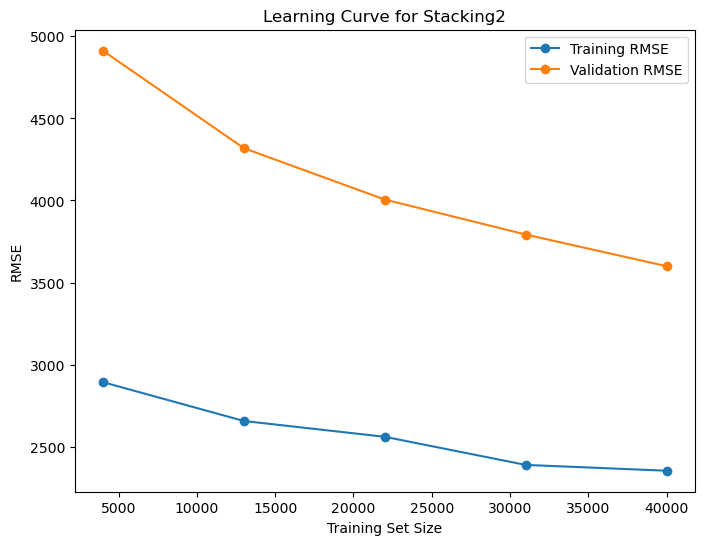


=== Ensemble Model Test Set Evaluation ===
Voting: Test RMSE = 3743.78, Test R² = 0.97, Adjusted Test R² = 0.97
Bagging: Test RMSE = 3200.19, Test R² = 0.98, Adjusted Test R² = 0.98
Stacking: Test RMSE = 3240.17, Test R² = 0.98, Adjusted Test R² = 0.98
ExtraTrees: Test RMSE = 3307.91, Test R² = 0.98, Adjusted Test R² = 0.98
AdaBoost: Test RMSE = 5790.48, Test R² = 0.93, Adjusted Test R² = 0.93
GradientBoosting: Test RMSE = 6158.17, Test R² = 0.93, Adjusted Test R² = 0.93
RandomForest: Test RMSE = 3107.22, Test R² = 0.98, Adjusted Test R² = 0.98
Stacking2: Test RMSE = 3354.33, Test R² = 0.98, Adjusted Test R² = 0.98
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=0.01; total time=   0.9s
[CV] END ..........................................a

[CV] END ..........................................alpha=0.1; total time=   0.1s
[CV] END ..........................................alpha=1.0; total time=   0.1s
[CV] END ........................................alpha=0.001; total time=   1.1s
[CV] END ..........................................alpha=1.0; total time=   0.2s
[CV] END ........................................alpha=0.001; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END .......................................max_depth=15; total time=   0.3s
[CV] END ........................................max_depth=5; total time=   0.8s
[CV] END .......................................max_depth=20; total time=   1.8s
[CV] END ......................max_depth=5, n_estimators=100; total time=   9.3s
[CV] END .....................max_depth=20, n_estimators=100; total time=  20.1s
[CV] END ......................max_depth=5, n_estimators=100; total time=  53.1s
[CV] END ...................

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from tqdm.notebook import tqdm
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import VotingRegressor, BaggingRegressor, StackingRegressor, ExtraTreesRegressor

# Set random seed for reproducibility
random_state = 42

# Define adjusted R² function
def adjusted_r2(r2, n, p):
    """
    Calculate adjusted R².
    
    Parameters:
        r2 (float): R² value.
        n (int): Number of samples.
        p (int): Number of predictors.
        
    Returns:
        float: Adjusted R².
    """
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)


# Subsample the entire dataset to 100,000 points
df_sub = df.sample(n=100000, random_state=random_state)

# Define features (X) and target (y) using the subsample
X = df_sub.drop('price', axis=1)
y = df_sub['price']


# Split data: 60% training, 20% validation, 20% test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=random_state)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)


# Apply PCA on a copy of the data (to compare with non-PCA models)
pca = PCA(n_components=0.95, random_state=random_state)  # keep 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("Original features:", X_train.shape[1], "PCA features:", X_train_pca.shape[1])

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()


# Define base models and parameter grids.
models = {
    'LinearRegression': (LinearRegression(), {}),  # no hyperparameters to tune here
    'Ridge': (Ridge(random_state=random_state), {'alpha': [0.1, 1.0, 10.0]}),
    'Lasso': (Lasso(random_state=random_state), {'alpha': [0.001, 0.01, 0.1, 1.0]}),
    # 'SVR': (SVR(), {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}),  # Removed due to long training time
    'DecisionTree': (DecisionTreeRegressor(random_state=random_state), {'max_depth': [5, 10, 15, 20]}),
    'RandomForest': (RandomForestRegressor(random_state=random_state), {'n_estimators': [50, 100], 'max_depth': [5, 10, 20]}),
    'GradientBoosting': (GradientBoostingRegressor(random_state=random_state), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'AdaBoost': (AdaBoostRegressor(random_state=random_state), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 1.0]})
}


# Run GridSearchCV for each model on both original and PCA data.
results = {}
for name, (model, params) in models.items():
    print(f"\n=== {name} on Original Data ===")
    gs = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error',
                      n_jobs=-1, return_train_score=True, verbose=2)
    gs.fit(X_train, y_train)
    best_model = gs.best_estimator_
    # Predictions and metrics on training and validation sets
    y_train_pred = best_model.predict(X_train)
    y_val_pred = best_model.predict(X_val)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    # Compute adjusted R2 for original data
    n_train, p_orig = X_train.shape[0], X_train.shape[1]
    adj_train_r2 = adjusted_r2(train_r2, n_train, p_orig)
    n_val, _ = X_val.shape
    adj_val_r2 = adjusted_r2(val_r2, n_val, p_orig)
    
    results[name + '_orig'] = {'model': best_model, 'grid': gs,
                               'train_rmse': train_rmse, 'val_rmse': val_rmse,
                               'train_r2': train_r2, 'val_r2': val_r2,
                               'adj_train_r2': adj_train_r2, 'adj_val_r2': adj_val_r2}
    print(f"Best params: {gs.best_params_}")
    print(f"Train RMSE: {train_rmse:.2f}, Val RMSE: {val_rmse:.2f}")
    print(f"Train R²: {train_r2:.2f}, Adjusted Train R²: {adj_train_r2:.2f}")
    print(f"Val R²: {val_r2:.2f}, Adjusted Val R²: {adj_val_r2:.2f}")

    print(f"\n=== {name} on PCA Data ===")
    gs_pca = GridSearchCV(model, params, cv=3, scoring='neg_mean_squared_error',
                          n_jobs=-1, return_train_score=True, verbose=2)
    gs_pca.fit(X_train_pca, y_train)
    best_model_pca = gs_pca.best_estimator_
    y_train_pred_pca = best_model_pca.predict(X_train_pca)
    y_val_pred_pca = best_model_pca.predict(X_val_pca)
    train_rmse_pca = np.sqrt(mean_squared_error(y_train, y_train_pred_pca))
    val_rmse_pca = np.sqrt(mean_squared_error(y_val, y_val_pred_pca))
    train_r2_pca = r2_score(y_train, y_train_pred_pca)
    val_r2_pca = r2_score(y_val, y_val_pred_pca)
    # For PCA, use the reduced number of features
    n_train_pca, p_pca = X_train_pca.shape[0], X_train_pca.shape[1]
    adj_train_r2_pca = adjusted_r2(train_r2_pca, n_train_pca, p_pca)
    n_val_pca, _ = X_val_pca.shape
    adj_val_r2_pca = adjusted_r2(val_r2_pca, n_val_pca, p_pca)
    
    results[name + '_pca'] = {'model': best_model_pca, 'grid': gs_pca,
                              'train_rmse': train_rmse_pca, 'val_rmse': val_rmse_pca,
                              'train_r2': train_r2_pca, 'val_r2': val_r2_pca,
                              'adj_train_r2': adj_train_r2_pca, 'adj_val_r2': adj_val_r2_pca}
    print(f"Best params: {gs_pca.best_params_}")
    print(f"Train RMSE (PCA): {train_rmse_pca:.2f}, Val RMSE (PCA): {val_rmse_pca:.2f}")
    print(f"Train R² (PCA): {train_r2_pca:.2f}, Adjusted Train R² (PCA): {adj_train_r2_pca:.2f}")
    print(f"Val R² (PCA): {val_r2_pca:.2f}, Adjusted Val R² (PCA): {adj_val_r2_pca:.2f}")

# Identify and save the best performing model based on validation RMSE
best_key = min(results, key=lambda k: results[k]['val_rmse'])
best_model = results[best_key]['model']
print("\nBest model overall:", best_key, "with Validation RMSE =", results[best_key]['val_rmse'])
joblib.dump(best_model, 'best_model.pkl')
print("Best model saved as 'best_model.pkl'.")

# Create 8 different ensemble models using some of the best performing base models.
selected_keys = [k for k in results if 'orig' in k]
selected_keys = sorted(selected_keys, key=lambda k: results[k]['val_rmse'])[:4]
print("Selected base models for ensemble:", selected_keys)
estimators = [(key, results[key]['model']) for key in selected_keys]

ensemble_models = {
    'Voting': VotingRegressor(estimators=estimators),
    'Bagging': BaggingRegressor(base_estimator=best_model, n_estimators=10, random_state=random_state),
    'Stacking': StackingRegressor(estimators=estimators, final_estimator=best_model, cv=3),
    'ExtraTrees': ExtraTreesRegressor(n_estimators=100, random_state=random_state),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=random_state),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=random_state),
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=random_state),
    'Stacking2': StackingRegressor(estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=50, random_state=random_state), cv=3)
}


# Define a function to plot the learning curve using training sizes.
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y,
                                                           cv=3,
                                                           scoring='neg_mean_squared_error',
                                                           n_jobs=-1,
                                                           train_sizes=np.linspace(0.1, 1.0, 5),
                                                           random_state=random_state if hasattr(model, 'random_state') else None)
    # Convert negative MSE to RMSE
    train_scores_mean = np.sqrt(-np.mean(train_scores, axis=1))
    val_scores_mean = np.sqrt(-np.mean(val_scores, axis=1))
    
    plt.figure(figsize=(8,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Training RMSE')
    plt.plot(train_sizes, val_scores_mean, 'o-', label='Validation RMSE')
    plt.title(title)
    plt.xlabel('Training Set Size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

# Train each ensemble model, record their performance, and plot the learning curves.
ensemble_results = {}
for name, model in tqdm(ensemble_models.items(), total=len(ensemble_models), desc="Training Ensembles"):
    print(f"\nTraining Ensemble Model: {name}")
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    # Calculate adjusted R² for ensemble 
    n_train, p_orig = X_train.shape[0], X_train.shape[1]
    adj_train_r2 = adjusted_r2(train_r2, n_train, p_orig)
    n_test = X_test.shape[0]
    adj_test_r2 = adjusted_r2(test_r2, n_test, p_orig)
    
    ensemble_results[name] = {'model': model, 'train_rmse': train_rmse,
                              'test_rmse': test_rmse, 'train_r2': train_r2, 'test_r2': test_r2,
                              'adj_train_r2': adj_train_r2, 'adj_test_r2': adj_test_r2}
    print(f"{name} -- Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}")
    print(f"{name} -- Train R²: {train_r2:.2f}, Adjusted Train R²: {adj_train_r2:.2f}")
    print(f"{name} -- Test R²: {test_r2:.2f}, Adjusted Test R²: {adj_test_r2:.2f}")
    
    # Plot the learning curve for the ensemble model
    plot_learning_curve(model, X_train, y_train, f"Learning Curve for {name}")

# Evaluate all ensemble models on the test set.
print("\n=== Ensemble Model Test Set Evaluation ===")
for name, res in ensemble_results.items():
    print(f"{name}: Test RMSE = {res['test_rmse']:.2f}, Test R² = {res['test_r2']:.2f}, Adjusted Test R² = {res['adj_test_r2']:.2f}")


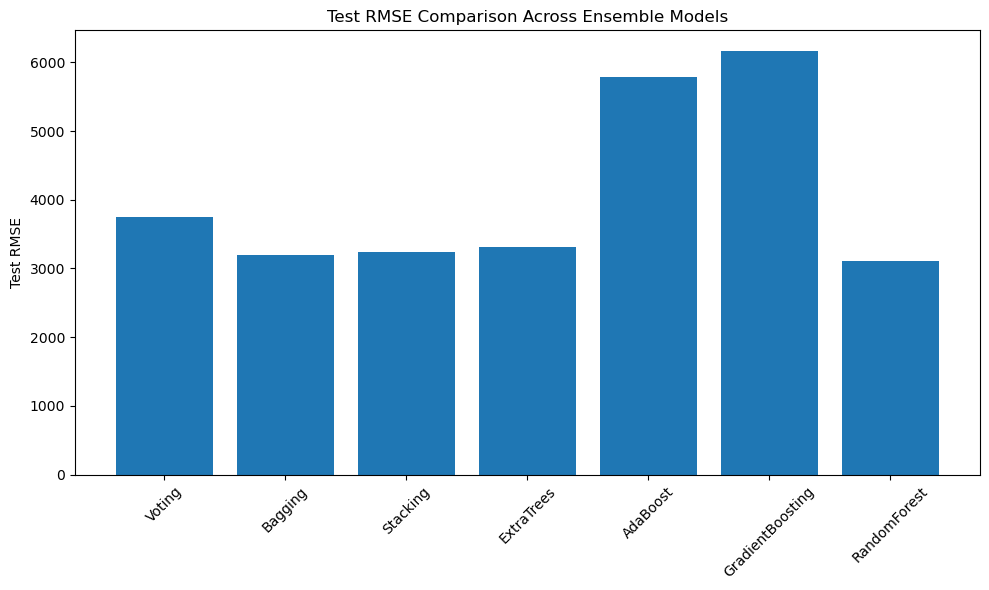

In [74]:
import matplotlib.pyplot as plt

models = ['Voting', 'Bagging', 'Stacking', 'ExtraTrees', 'AdaBoost', 'GradientBoosting', 'RandomForest']
rmse = [3743.78, 3200.19, 3240.17, 3307.91, 5790.48, 6158.17, 3107.22]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse)
plt.ylabel('Test RMSE')
plt.title('Test RMSE Comparison Across Ensemble Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ensemble_rmse.png')
plt.show()


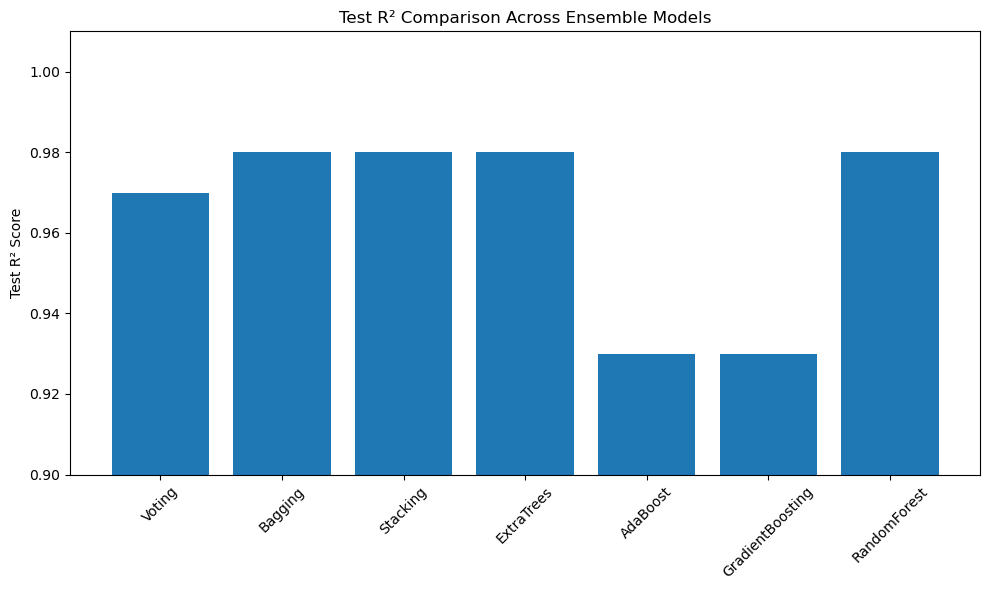

In [75]:
r2_scores = [0.97, 0.98, 0.98, 0.98, 0.93, 0.93, 0.98]

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores)
plt.ylabel('Test R² Score')
plt.title('Test R² Comparison Across Ensemble Models')
plt.ylim(0.9, 1.01)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('ensemble_r2.png')
plt.show()
